Git
how to choose companies
Time stamp
Feature, Target

words or sentence? -> libraries to calculate sentiment
predictprob function
lower - case

In [157]:
import pandas as pd
import numpy as np
import datetime 
from textblob import TextBlob
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
#import the stock price data
SP_df = pd.read_csv("WIKI_PRICES.csv")

In [3]:
SP_df.head()

,ticker,date,open,high,low,close,volume,ex-dividend,split_ratio,adj_open,adj_high,adj_low,adj_close,adj_volume
0,A,1999-11-18,45.50,50.00,40.00,44.00,44739900.0,0.0,1.0,31.105117,34.181447,27.345157,30.079673,44739900.0
1,A,1999-11-19,42.94,43.00,39.81,40.38,10897100.0,0.0,1.0,29.355027,29.396044,27.215268,27.604936,10897100.0
2,A,1999-11-22,41.31,44.00,40.06,44.00,4705200.0,0.0,1.0,28.240711,30.079673,27.386175,30.079673,4705200.0
3,A,1999-11-23,42.50,43.63,40.25,40.25,4274400.0,0.0,1.0,29.054230,29.826730,27.516065,27.516065,4274400.0
4,A,1999-11-24,40.13,41.94,40.00,41.06,3464400.0,0.0,1.0,27.434029,28.671398,27.345157,28.069804,3464400.0


In [4]:
combi = {}
for date, ticker, close in zip(SP_df['date'], SP_df['ticker'], SP_df['adj_close']):
    combi[(date, ticker)] = close

In [5]:
#check the number of data
len(SP_df)

14935063

In [6]:
#import the news data
NEWS_df = pd.read_csv("uci-news-aggregator.csv")

In [7]:
NEWS_df.head()

,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP
0,1,"Fed official says weak data caused by weather,...",http://www.latimes.com/business/money/la-fi-mo...,Los Angeles Times,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.latimes.com,1394470370698
1,2,Fed's Charles Plosser sees high bar for change...,http://www.livemint.com/Politics/H2EvwJSK2VE6O...,Livemint,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.livemint.com,1394470371207
2,3,US open: Stocks fall after Fed official hints ...,http://www.ifamagazine.com/news/us-open-stocks...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371550
3,4,"Fed risks falling 'behind the curve', Charles ...",http://www.ifamagazine.com/news/fed-risks-fall...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371793
4,5,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,http://www.moneynews.com/Economy/federal-reser...,Moneynews,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.moneynews.com,1394470372027


In [122]:
print(NEWS_df['TIMESTAMP'].min())
print(NEWS_df['TIMESTAMP'].max())

2014-03-10 16:52:50.698000
2014-08-28 12:33:11.565000


In [8]:
#check the number of data
len(NEWS_df)

422419

In [9]:
companies = {"3M": "MMM",
             "American Express":"AXP",
             "Apple":"AAPL",
             "Boeing":"BA",
             "Caterpillar":"CAT",
             "Chevron":"CVX",
             "Cisco Systems":"CSCO",
             "Coca-Cola":"KO",
             "DuPont":"DD",
             "ExxonMobil":"XOM",
             "General Electric":"GE",
             "Goldman Sachs":"GS",
             "Home Depot":"HD",
             "IBM":"IBM",
             "Intel":"INTC",
             "Johnson & Johnson":"JNJ",
             "JPMorgan Chase":"JPM",
             "McDonald's":"MCD",
             "Merck":"MRK",
             "Microsoft":"MSFT",
             "Nike":"NKE",
             "Pfizer":"PFE",
             "Procter & Gamble":"PG",
             "Travelers":"TRV",
             "UnitedHealth Group":"UNH",
             "United Technologies":"UTX",
             "Verizon":"VZ",
             "Visa":"V",
             "Walmart":"WMT",
             "Walt Disney":"DIS"
}

In [10]:
#try to check whether there is enough data for above companies
def count_news(companies):
    total = 0
    news_count = {}
    for key, item in companies.items():
        num =  len(NEWS_df[NEWS_df['TITLE'].str.contains(key, na=False)])
        total += num
        news_count[key] = num
    
    return total, news_count

total, news_count = count_news(companies)
print(total)
print(news_count)

24550
{'3M': 144, 'American Express': 12, 'Apple': 10317, 'Boeing': 596, 'Caterpillar': 116, 'Chevron': 22, 'Cisco Systems': 11, 'Coca-Cola': 302, 'DuPont': 33, 'ExxonMobil': 5, 'General Electric': 127, 'Goldman Sachs': 124, 'Home Depot': 115, 'IBM': 1058, 'Intel': 675, 'Johnson & Johnson': 70, 'JPMorgan Chase': 116, "McDonald's": 790, 'Merck': 199, 'Microsoft': 6984, 'Nike': 209, 'Pfizer': 1072, 'Procter & Gamble': 102, 'Travelers': 35, 'UnitedHealth Group': 15, 'United Technologies': 6, 'Verizon': 651, 'Visa': 149, 'Walmart': 424, 'Walt Disney': 71}


In [11]:
#try to check whether there is corresponding stock price data for above companies
for key, item in companies.items():
    if item in SP_df['ticker'].values:
        continue
    else:
        print('Following company doesn\'nt exist: {}'.format(item))

In [12]:
#delete the companies with the small number of news in NEWS_df
for key, item in news_count.items():
    if news_count[key] < 100:
        companies.pop(key)

total_v2, news_count_v2 = count_news(companies)
print(total_v2)
print(news_count_v2)

24270
{'3M': 144, 'Apple': 10317, 'Boeing': 596, 'Caterpillar': 116, 'Coca-Cola': 302, 'General Electric': 127, 'Goldman Sachs': 124, 'Home Depot': 115, 'IBM': 1058, 'Intel': 675, 'JPMorgan Chase': 116, "McDonald's": 790, 'Merck': 199, 'Microsoft': 6984, 'Nike': 209, 'Pfizer': 1072, 'Procter & Gamble': 102, 'Verizon': 651, 'Visa': 149, 'Walmart': 424}


In [13]:
#drop the unnecessary column of NEWS_df
NEWS_df = NEWS_df.drop(["CATEGORY","STORY","HOSTNAME"], axis=1)
NEWS_df.columns

Index(['ID', 'TITLE', 'URL', 'PUBLISHER', 'TIMESTAMP'], dtype='object')

In [14]:
#convert timestamp to date
NEWS_df['TIMESTAMP'] = pd.to_datetime(NEWS_df['TIMESTAMP'], unit='ms')

In [15]:
#Create a function that determine whether the news title includes any company

def company_in_news(paragraph, companies):
    """
    input; paragraph: string, companies: dictionary
    output; boolean
    """
    words = paragraph.split()
    is_inNews = False
    for i in range(len(words)):
        if words[i] in companies.keys():
            is_inNews = True
    
    return is_inNews



memo for myself  
__number difference with str.contain()__  
len(NEWS_companies_df)

In [16]:
#create the new dataframe which consists of relevant news only
NEWS_companies_df = NEWS_df[NEWS_df['TITLE'].apply(company_in_news, args=(companies,)) == True]

In [17]:
#create a function which give the label of the company's ticker to the news

def label_news(paragraph, companies):
    """
    input; paragraph: string, companies: dictionary
    output; name: company's ticker
    """
    words = paragraph.split()
    for i in range(len(words)):
        if words[i] in companies.keys():
            return companies[words[i]]
    
    return 'NaN'

NEWS_companies_df['ticker'] = NEWS_companies_df['TITLE'].apply(label_news, args=(companies,))


C:\Users\the_b\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


memo for myself  
__could be together with company_in_news__  
__got a warning__

In [18]:
date_set = set(SP_df['date'])
date_list = list(date_set)
date_list.sort()
    
#     #get the day which is one day before input date
#     def get_day_before(date, SP_df):


#         ind = date_list.index(date)

#         return date_list[ind-1]

In [148]:
#create a function that takes the corresponding the stock price move
#this function runs very slow. next cell might take more than 10 mins to run
def get_move(row):
    
    """
    input; row: entire row, SP_df: DataFrame of stock price
    output; boolean
    """    
    
    date_tmp = row['TIMESTAMP']
    
    #check the hour of the news, and then if it's after 17, make the date next day.
    if date_tmp.hour >= 17:
        date = date_tmp + datetime.timedelta(days=1)
    else:
        date = date_tmp
    date1 = datetime.datetime.strftime(date, "%Y-%m-%d")

    
    #get the date0
    try:
        ind = date_list.index(date1)
    except ValueError:
        return np.nan
    date0 = date_list[ind-1]
    

#     day0_price = SP_df.loc[(SP_df['date'] == date0) & (SP_df['ticker'] == row['ticker']), 'adj_close']
#     day1_price = SP_df.loc[(SP_df['date'] == date1) & (SP_df['ticker'] == row['ticker']), 'adj_close']

    try:
        day0_price = combi[(date0, row['ticker'])]
        day1_price = combi[(date1, row['ticker'])]
    except KeyError:
        return np.nan
    
    #return True if the stock price went up by more than 10%
    if ((day1_price - day0_price)/day0_price) > 0.005:
        return True
    elif ((day1_price - day0_price)/day0_price) < -0.005:
        return False
    else:
        return np.nan
    


In [149]:
NEWS_companies_df['IsUp'] = NEWS_companies_df.apply(get_move, axis = 1)

C:\Users\the_b\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [150]:
with_move_df = NEWS_companies_df.dropna(how='any')

In [151]:
def get_sentiment(sentences):
    blob = TextBlob(sentences)
    for sentence in blob.sentences:
        return sentence.sentiment.polarity

In [152]:
with_move_df['Sentiment'] = with_move_df['TITLE'].apply(get_sentiment)

C:\Users\the_b\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [153]:
#print(with_move_df.sample(20))
unique, counts = np.unique(with_move_df['IsUp'].values, return_counts=True)
dict(zip(unique, counts))

{False: 3281, True: 5730}

In [154]:
def add_time(row):
    return datetime.datetime.strftime(row['TIMESTAMP'], "%Y-%m-%d")

In [155]:
with_move_df['Day'] = with_move_df.apply(add_time, axis = 1)
print(len(with_move_df))

9011


C:\Users\the_b\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [156]:
grouped = with_move_df.groupby(['Day','ticker'])
grouped.size()
with_move.ticker == ''
agg

Day         ticker
2014-03-10  BA          4
            MCD        31
            MSFT       12
2014-03-11  AAPL      113
            BA          1
            MSFT        1
            VZ          1
2014-03-12  MSFT       50
            VZ         12
2014-03-13  AAPL       11
            BA          1
            INTC       20
            MSFT       22
            VZ          2
2014-03-17  BA          3
            MSFT      117
            PFE         4
2014-03-18  AAPL      300
            MSFT      136
2014-03-19  BA          1
2014-03-20  BA         48
            IBM         1
            INTC        1
            MSFT       10
            VZ          2
            WMT        46
2014-03-24  AAPL       27
            BA          1
            MRK         4
            MSFT       89
                     ... 
2014-07-09  IBM         1
2014-07-10  BA         49
2014-07-15  AAPL        7
            MSFT      173
2014-07-16  AAPL      100
            IBM        49
            INTC   

In [166]:
def take_important(df, IsTrue):
    new_df = df['TITLE'][df['IsUp']==IsTrue]
    
    counter = Counter()
#     for index, row in df.iterrows():
#         if row['IsUp'] == IsTrue:
#             for w in row['TITLE'].split():
#                 if w in count:
#                     count[w] += 1
#                 else:
#                     count[w] = 1
    
    return counter

In [167]:
count_up = take_important(with_move_df, True)

In [147]:
take_important(with_move_df, False)

{'"national': 1,
 '$0.01': 1,
 '$106-billion': 1,
 '$14': 12,
 '$14.2': 20,
 '$14.2...': 1,
 '$14.2B': 11,
 '$14.2BN': 1,
 '$14.2bn': 3,
 '$14B': 4,
 '$1B': 1,
 '$1bn': 1,
 '$2.1B': 1,
 '$99': 1,
 '&': 17,
 "'Sharknado": 1,
 "'cheerleader'": 1,
 "'could": 1,
 "'wrong'": 1,
 '(M8)': 1,
 '(MRK)': 1,
 '(PFE)': 3,
 '(Video)': 1,
 '-': 1,
 '--': 2,
 '...': 13,
 '1': 1,
 '13': 1,
 '14.2': 1,
 '15': 3,
 '15%': 6,
 '15-inch': 1,
 '1Q': 3,
 '1st-quarter': 1,
 "2'": 1,
 '2014': 2,
 '21': 1,
 '2nd': 1,
 '3%': 1,
 '3-Bayer': 1,
 '3Q,': 1,
 '3rd': 1,
 '4.4.2': 1,
 '8.1': 1,
 'AG': 3,
 'ANALYSIS:': 1,
 'Acquiring': 1,
 'Adj.': 2,
 'Ahead': 1,
 'Amazon': 1,
 'Amid': 1,
 'And': 1,
 'Android': 1,
 'Animal': 1,
 'Announces': 1,
 'Apple': 10,
 'Approaches': 1,
 'As': 4,
 'Astra': 2,
 'AstraZeneca': 22,
 'Aug.': 1,
 'Away': 1,
 'Back-to-School': 1,
 'Backs': 1,
 'Bayer': 74,
 "Bayer's": 5,
 'Bayer,': 1,
 'Beats': 3,
 'Bid': 3,
 'Big': 4,
 'Billion': 7,
 'Biz': 1,
 'Blockbusters': 1,
 'Boeing': 1,
 'Boost'

In [93]:
X = with_move_df['Sentiment']
X = X.values.reshape(-1,1)
y = with_move_df['IsUp'].values
y = y.astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)
y_actual = y_test

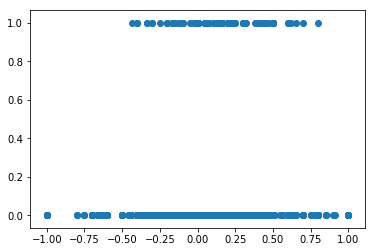

In [94]:


plt.scatter(X_train,y_train)
plt.show()

In [95]:
LR = LogisticRegression(C=0.1)
LR.fit(X_train, y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [96]:
y_pred = LR.predict(X_test)


In [97]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [98]:
print(confusion_matrix(y_actual, y_pred))

[[4350    0]
 [ 120    0]]


In [99]:
print(classification_report(y_actual,
                            y_pred,
                            target_names=['up', 'down']))

             precision    recall  f1-score   support

         up       0.97      1.00      0.99      4350
       down       0.00      0.00      0.00       120

avg / total       0.95      0.97      0.96      4470



C:\Users\the_b\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [31]:
word to vec

SyntaxError: invalid syntax (<ipython-input-31-3369551aea19>, line 1)